<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Normality_Check_and_ANOVA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Statistics Lab

This lab covers some of the important statistical tests and concepts using Python. We'll explore Normality Check using Chi-Square (χ²), One-Way ANOVA, F-test, and 2-Sample Test.

## 1. Normality Check using Chi-Square (χ²)

Chi-Square test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. In the context of normality, it checks whether the data follows a normal distribution.

In [1]:

import scipy.stats as stats
import numpy as np

# Generating a normal distribution sample
data = np.random.normal(0, 1, 1000)

# Performing the Chi-Square test
chi2_stat, p_val = stats.normaltest(data)

# Interpreting the result
if p_val < 0.05:
    print("Data does not follow a normal distribution")
else:
    print("Data follows a normal distribution")


Data follows a normal distribution


## 2. One-Way ANOVA

One-Way Analysis of Variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

In [2]:

import scipy.stats as stats

# Generating sample data
group1 = np.random.normal(0, 1, 100)
group2 = np.random.normal(0, 1, 100)
group3 = np.random.normal(0, 1, 100)

# Performing the One-Way ANOVA
anova_result = stats.f_oneway(group1, group2, group3)

# Interpreting the result
if anova_result.pvalue < 0.05:
    print("At least one group mean is different")
else:
    print("No group mean is significantly different")


No group mean is significantly different


## 3. F-test

The F-test is used to compare two population variances. It assumes that the populations are normally distributed.

In [3]:

# Calculating variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)

# Calculating the F-test statistic
f_test = variance1/variance2

# Interpreting the result
if f_test > 1:
    print("Variance of group1 is greater than group2")
else:
    print("Variance of group2 is greater than group1")


Variance of group1 is greater than group2


## 4. 2-Sample Test

The 2-Sample Test, specifically the 2-Sample t-test, is used to compare the means of two independent groups.

In [4]:

# Performing the 2-Sample t-test
t_test_result = stats.ttest_ind(group1, group2)

# Interpreting the result
if t_test_result.pvalue < 0.05:
    print("Means are significantly different")
else:
    print("Means are not significantly different")


Means are not significantly different


# Case Study Examples

**Normality test using X^2**

**Problem:** A manufacturing company produces iron stick for construction purposes. A key quality characteristic of the products is their length, with the customers requesting that the products are 19.5 ± 4.5 metres. Recently, there have been many complaints regarding the quality of the product and thus you have decided to collect a sample and investigate the process.

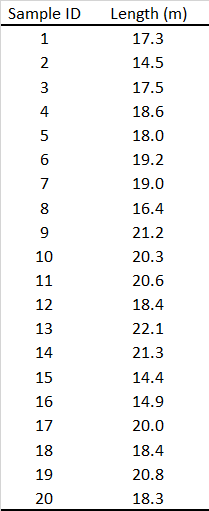

Ho: The data derives from a normal distribution.

H1: The data does not derive from a normal distribution.

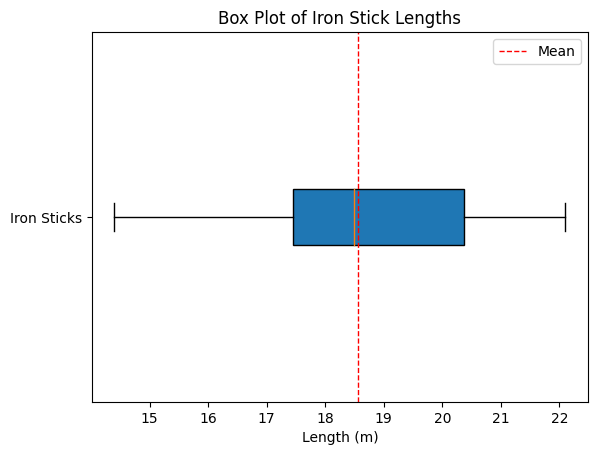

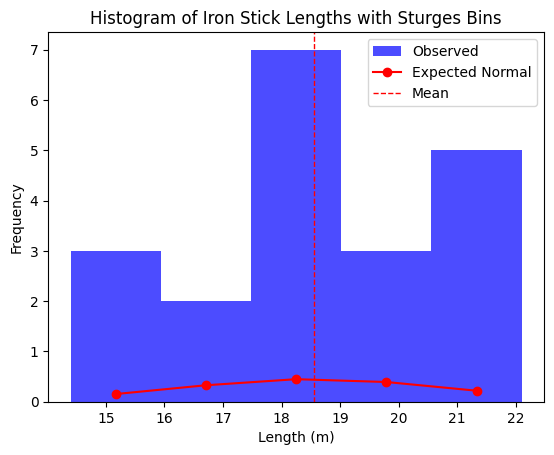

Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 4.435655296989653, p-value: 0.3502454236030536
Decision: The data derives from a normal distribution


<ipython-input-12-3c9d9eb74177>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.032723,0.090255,1.986253
1,0.122978,0.193254,4.252977
2,0.316232,0.264476,5.820368
3,0.580708,0.231395,5.092348
4,0.812102,0.129415,2.848054
5,Sum =,0.908793,20.000000


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


length_data = np.array([
    17.3, 14.5, 17.5, 18.6, 18.0, 19.2, 19.0, 16.4, 21.2, 20.3,
    20.6, 18.4, 22.1, 21.3, 14.4, 14.9, 20.0, 18.4, 20.8, 18.3
])

# Calculate descriptive statistics
mean = np.mean(length_data)
std_dev = np.std(length_data, ddof=1)

# Calculate Sturges' number of bins
n = len(length_data)
k = int(1 + 3.322 * np.log10(n))

# Histogram and expected frequencies
hist, bin_edges = np.histogram(length_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges, mean, std_dev)
bin_frequencies = np.diff(cdf_values)
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized)

# Box plot
plt.boxplot(length_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.yticks([1], ['Iron Sticks'])
plt.legend()
plt.show()

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Histogram
plt.hist(length_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.plot(bin_centers, expected_frequencies_normalized * ((bin_edges[1] - bin_edges[0]) / n),
         'ro-', label='Expected Normal')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths with Sturges Bins')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_frequencies_normalized
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")
print(f"Decision: The data derives from a {'normal' if p_value > 0.05 else 'not normal'} distribution")

# Display the table
table_df

Since the p-value is greater than the common alpha level of 0.05, we do not reject the null hypothesis that the data comes from a normal distribution.

**Decision:** The data derives from a normal distribution.

**x2 -test**

**Problem:** As part of their policy of fairness and equality, the government has agreed that the salaries offered in public sector should be following the normal distribution with a specified mean of 45.000€ and a standard deviation of 7.500€. Recently, there have been some complaints and the minister of economics is worried that the standard deviation has changed. The following sample data has been collected for testing purposes.

In [9]:
# Sample salary data
salary_data = np.array([
    45467.8, 33166.7, 28465.9, 39127.3, 53181.5, 39191.5, 50346.9, 45806.7,
    42248.7, 48799.4, 39569.7, 50583.6, 45362.0, 46401.9, 41767.5, 25321.3,
    44068.2, 54193.4, 23167.9, 61496.5, 51420.7, 43491.1, 61666.5, 50661.1, 36911.9
])

# Parameters for the normal distribution as specified by the government
specified_mean = 45000  # Specified mean salary
specified_std = 7500     # Specified standard deviation

# Perform a chi-square test for standard deviation
# Calculate the chi-square statistic for the sample variance against the specified variance
sample_variance = np.var(salary_data, ddof=1)
chi_square_stat = (len(salary_data) - 1) * sample_variance / (specified_std ** 2)

# Degrees of freedom for the test is n - 1
df = len(salary_data) - 1

# Calculate the p-value for the chi-square statistic
p_value = 1 - stats.chi2.cdf(chi_square_stat, df)

# Output the chi-square statistic and the p-value
chi_square_stat, p_value

(40.74709399342933, 0.017752898089605895)

**Decision:** The standard deviation seems to have changed.
The p-value is less than the α = 5% which means that we have significant evidence to reject the null hypothesis. The standard deviation has changed and thus the complaints seem to be valid.

**One-way ANOVA**
**Problem:** A car manufacturing company is planning to launch a new car in the market. They have developed three different types and they are interested in seeing whether there is any difference in their fuel consumption.

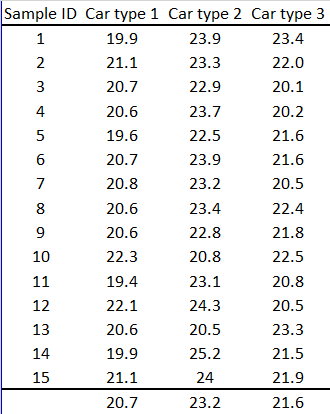

H0: μ1= μ2 = μ3

H1: 𝐴𝑡 𝑙𝑒𝑎𝑠𝑡 𝑜𝑛𝑒 𝑜𝑓 𝑡ℎ𝑒 𝑚𝑒𝑎𝑛𝑠 𝑖𝑠 𝑛𝑜𝑡 𝑒𝑞𝑢𝑎𝑙

In [13]:
# Car fuel consumption data
car_type_1 = np.array([19.9, 21.1, 20.7, 20.6, 19.6, 20.7, 20.8, 20.6, 20.6, 22.3, 19.4, 22.1, 20.6, 19.9, 21.1])
car_type_2 = np.array([23.9, 23.3, 22.9, 23.7, 22.5, 23.9, 23.2, 23.4, 22.8, 20.8, 23.1, 24.3, 20.5, 25.2, 24])
car_type_3 = np.array([23.4, 22.0, 20.1, 20.2, 21.6, 21.6, 20.5, 22.4, 21.8, 22.5, 20.8, 20.5, 23.3, 21.5, 21.9])

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(car_type_1, car_type_2, car_type_3)

# Calculate summary statistics for each group
summary_stats = pd.DataFrame({
    'Groups': ['Car type 1', 'Car type 2', 'Car type 3'],
    'Count': [len(car_type_1), len(car_type_2), len(car_type_3)],
    'Sum': [np.sum(car_type_1), np.sum(car_type_2), np.sum(car_type_3)],
    'Average': [np.mean(car_type_1), np.mean(car_type_2), np.mean(car_type_3)],
    'Variance': [np.var(car_type_1, ddof=1), np.var(car_type_2, ddof=1), np.var(car_type_3, ddof=1)]
})

# Calculate ANOVA table components
group_means = [np.mean(car_type_1), np.mean(car_type_2), np.mean(car_type_3)]
grand_mean = np.mean(np.concatenate([car_type_1, car_type_2, car_type_3]))

# Sum of Squares Between (SSB)
ss_between = sum([len(car_type) * (mean - grand_mean) ** 2 for car_type, mean in zip([car_type_1, car_type_2, car_type_3], group_means)])

# Sum of Squares Within (SSW)
ss_within = sum([np.sum((car_type - mean) ** 2) for car_type, mean in zip([car_type_1, car_type_2, car_type_3], group_means)])

# Total Sum of Squares (SST)
ss_total = ss_between + ss_within

# Degrees of freedom Between
df_between = len(group_means) - 1

# Degrees of freedom Within
df_within = len(np.concatenate([car_type_1, car_type_2, car_type_3])) - len(group_means)

# Mean Square Between (MSB)
ms_between = ss_between / df_between

# Mean Square Within (MSW)
ms_within = ss_within / df_within

# F critical value for a 0.05 alpha level
f_crit = stats.f.ppf(q=1-0.05, dfn=df_between, dfd=df_within)

# ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'SS': [ss_between, ss_within, ss_total],
    'df': [df_between, df_within, df_between + df_within],
    'MS': [ms_between, ms_within, ''],
    'F': [f_stat, '', ''],
    'P-value': [p_value, '', ''],
    'F crit': [f_crit, '', '']
})

# Display results
print(summary_stats, '\n')
print(anova_table)

       Groups  Count    Sum    Average  Variance
0  Car type 1     15  310.0  20.666667  0.646667
1  Car type 2     15  347.5  23.166667  1.493810
2  Car type 3     15  324.1  21.606667  1.082095 

  Source of Variation      SS  df       MS         F P-value    F crit
0      Between Groups  47.836   2   23.918  22.26607     0.0  3.219942
1       Within Groups  45.116  42  1.07419                            
2               Total  92.952  44                                     


**Decision:** Reject the null hypothesis

There is a significant difference between the three types of cars in regards to their fuel consumption performance.


**f-Test**

**Problem:** After having received many complaints, the minister of economics is interested in investigating whether the variabilities of the salaries of male and female employees in the public sector are equal. The following sample data has been collected for testing purposes.

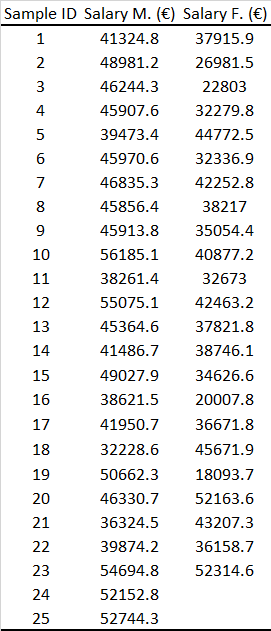



In [14]:
import numpy as np
import pandas as pd
from scipy import stats

# Given salary data
salary_m = np.array([
    41324.8, 48981.2, 46244.3, 45907.6, 39473.4, 45970.6, 46835.3, 45856.4,
    45913.8, 56185.1, 38261.4, 55075.1, 45364.6, 41486.7, 49027.9, 38621.5,
    41950.7, 32228.6, 50662.3, 46330.7, 36324.5, 39874.2, 54694.8, 52152.8, 52744.3
])
salary_f = np.array([
    37915.9, 26981.5, 22803, 32279.8, 44772.5, 32336.9, 42252.8, 38217,
    35054.4, 40877.2, 32673, 42463.2, 37821.8, 38746.1, 34626.6, 20007.8,
    36671.8, 45671.9, 18093.7, 52163.6, 43207.3, 36158.7, 52314.6
])

# Perform F-test for equal variances
variance_m = np.var(salary_m, ddof=1)
variance_f = np.var(salary_f, ddof=1)
F = variance_m / variance_f
df_m = len(salary_m) - 1
df_f = len(salary_f) - 1
p_value_one_tail = stats.f.cdf(F, df_m, df_f)  # This is the p-value for the one-tail test
p_value_two_tail = 2 * min(p_value_one_tail, 1 - p_value_one_tail)  # Two-tail test
f_crit_one_tail = stats.f.ppf(1 - 0.05, df_m, df_f)

# Descriptive statistics
desc_stats_m = {
    'Mean': np.mean(salary_m),
    'Standard Error': stats.sem(salary_m),
    'Median': np.median(salary_m),
    'Standard Deviation': np.std(salary_m, ddof=1),
    'Variance': variance_m,
    'Minimum': np.min(salary_m),
    'Maximum': np.max(salary_m),
    'Range': np.ptp(salary_m),
    'Sum': np.sum(salary_m),
    'Count': len(salary_m)
}

desc_stats_f = {
    'Mean': np.mean(salary_f),
    'Standard Error': stats.sem(salary_f),
    'Median': np.median(salary_f),
    'Standard Deviation': np.std(salary_f, ddof=1),
    'Variance': variance_f,
    'Minimum': np.min(salary_f),
    'Maximum': np.max(salary_f),
    'Range': np.ptp(salary_f),
    'Sum': np.sum(salary_f),
    'Count': len(salary_f)
}

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_m, desc_stats_f], index=['Salary M. (€)', 'Salary F. (€)']).T

# Add statistical summary to the previous output
output = {
    'F Statistic': F,
    'p-value (two-tailed)': p_value_two_tail,
    'F Critical (one-tailed, 95%)': f_crit_one_tail,
    'Descriptive Statistics': desc_stats_df
}

output

{'F Statistic': 0.48375128250591193,
 'p-value (two-tailed)': 0.08588346383375176,
 'F Critical (one-tailed, 95%)': 2.0283185080245336,
 'Descriptive Statistics':                     Salary M. (€)  Salary F. (€)
 Mean                 4.549970e+04   3.670048e+04
 Standard Error       1.235732e+03   1.852334e+03
 Median               4.591380e+04   3.782180e+04
 Standard Deviation   6.178660e+03   8.883482e+03
 Variance             3.817584e+07   7.891626e+07
 Minimum              3.222860e+04   1.809370e+04
 Maximum              5.618510e+04   5.231460e+04
 Range                2.395650e+04   3.422090e+04
 Sum                  1.137493e+06   8.441111e+05
 Count                2.500000e+01   2.300000e+01}

**Decision:** Fail to reject the Null hypothesis
There is not significant evidence to suggest that the standard deviation of the two groups is different. Further investigation to the complaints should be conducted.


**2-Sample t-Test**
**Problem:** After having received many complaints, the minister of economics is interested in investigating whether the variabilities of the salaries of male and female employees in the public sector are equal. The test of variances though has shown that the variances are equal, and therefore the minister decided to investigate potential differences in the mean.

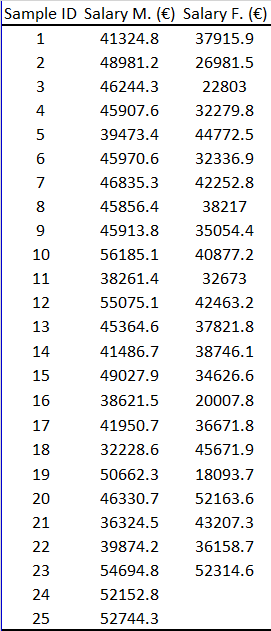


In [30]:
import numpy as np
import pandas as pd
from scipy import stats

# Given salary data
salary_m = np.array([
    41324.8, 48981.2, 46244.3, 45907.6, 39473.4, 45970.6, 46835.3, 45856.4,
    45913.8, 56185.1, 38261.4, 55075.1, 45364.6, 41486.7, 49027.9, 38621.5,
    41950.7, 32228.6, 50662.3, 46330.7, 36324.5, 39874.2, 54694.8, 52152.8, 52744.3
])
salary_f = np.array([
    37915.9, 26981.5, 22803, 32279.8, 44772.5, 32336.9, 42252.8, 38217,
    35054.4, 40877.2, 32673, 42463.2, 37821.8, 38746.1, 34626.6, 20007.8,
    36671.8, 45671.9, 18093.7, 52163.6, 43207.3, 36158.7, 52314.6
    # Note: The missing value for the 24th observation for Salary F. is excluded
])

# Perform F-test for equal variances
variance_m = np.var(salary_m, ddof=1)
variance_f = np.var(salary_f, ddof=1)
F = variance_m / variance_f
df_m = len(salary_m) - 1
df_f = len(salary_f) - 1
p_value_one_tail = stats.f.cdf(F, df_m, df_f)  # This is the p-value for the one-tail test
p_value_two_tail = 2 * min(p_value_one_tail, 1 - p_value_one_tail)  # Two-tail test
f_crit_one_tail = stats.f.ppf(1 - 0.05, df_m, df_f)

# Conduct a two-sample t-test assuming equal variances
#t_stat, p_value = stats.ttest_ind(salary_m, salary_f, equal_var=True)

# Calculate degrees of freedom
df = df_m + df_f

# Critical t-value for one-tailed and two-tailed test at the 95% confidence level
t_crit_one_tail = stats.t.ppf(1 - 0.05, df)
t_crit_two_tail = stats.t.ppf(1 - 0.025, df)

# Descriptive statistics
descriptive_stats = {
    'Salary M. (€)': {
        'Mean': np.mean(salary_m),
        'Standard Error': stats.sem(salary_m),
        'Median': np.median(salary_m),
        'Mode': "N/A",  # Mode is not typically calculated for continuous data
        'Standard Deviation': np.std(salary_m, ddof=1),
        'Variance': variance_m,
        'Range': np.ptp(salary_m),
        'Minimum': np.min(salary_m),
        'Maximum': np.max(salary_m),
        'Sum': np.sum(salary_m),
        'Count': len(salary_m)
    },
    'Salary F. (€)': {
        'Mean': np.mean(salary_f),
        'Standard Error': stats.sem(salary_f),
        'Median': np.median(salary_f),
        'Mode': "N/A",
        'Standard Deviation': np.std(salary_f, ddof=1),
        'Variance': variance_f,
        'Range': np.ptp(salary_f),
        'Minimum': np.min(salary_f),
        'Maximum': np.max(salary_f),
        'Sum': np.sum(salary_f),
        'Count': len(salary_f)
    }
}

# Convert the results to a DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Format the DataFrame to suppress scientific notation and round to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
descriptive_stats_df = descriptive_stats_df.round(2)

descriptive_stats_df

,Salary M. (€),Salary F. (€)
Mean,45499.70,36700.48
Standard Error,1235.73,1852.33
Median,45913.80,37821.80
Mode,N/A,N/A
Standard Deviation,6178.66,8883.48
Variance,38175841.42,78916258.84
Range,23956.50,34220.90
Minimum,32228.60,18093.70
Maximum,56185.10,52314.60
Sum,1137492.60,844111.10


In [31]:
# Output the results
descriptive_stats_df

# Perform two-sample t-test assuming equal variances
t_stat, p_value = stats.ttest_ind(salary_m, salary_f, equal_var=True)

# Degrees of freedom for the t-test
df = len(salary_m) + len(salary_f) - 2

# Critical t-value for one-tailed and two-tailed test at the 95% confidence level
t_crit_one_tail = stats.t.ppf(1 - 0.05, df)
t_crit_two_tail = stats.t.ppf(1 - 0.025, df)

# p-value for the two-tailed test
p_value_two_tail = p_value * 2  # Since the ttest_ind function returns the two-tailed p-value

# Pooled variance calculation
pooled_variance = (variance_m * (len(salary_m) - 1) + variance_f * (len(salary_f) - 1)) / df

# Construct the t-test table
t_test_results = {
    'Mean': {'Salary M. (€)': descriptive_stats['Salary M. (€)']['Mean'], 'Salary F. (€)': descriptive_stats['Salary F. (€)']['Mean']},
    'Variance': {'Salary M. (€)': descriptive_stats['Salary M. (€)']['Variance'], 'Salary F. (€)': descriptive_stats['Salary F. (€)']['Variance']},
    'Observations': {'Salary M. (€)': descriptive_stats['Salary M. (€)']['Count'], 'Salary F. (€)': descriptive_stats['Salary F. (€)']['Count']},
    'Pooled Variance': {'Salary M. (€)': pooled_variance, 'Salary F. (€)': pooled_variance},
    'Hypothesized Mean Difference': {'Salary M. (€)': 0, 'Salary F. (€)': 0},
    'df': {'Salary M. (€)': df, 'Salary F. (€)': df},
    't Stat': {'Salary M. (€)': t_stat, 'Salary F. (€)': t_stat},
    'P(T<=t) one-tail': {'Salary M. (€)': p_value / 2 if t_stat > 0 else 1 - p_value / 2, 'Salary F. (€)': p_value / 2 if t_stat > 0 else 1 - p_value / 2},
    't Critical one-tail': {'Salary M. (€)': t_crit_one_tail, 'Salary F. (€)': t_crit_one_tail},
    'P(T<=t) two-tail': {'Salary M. (€)': p_value_two_tail, 'Salary F. (€)': p_value_two_tail},
    't Critical two-tail': {'Salary M. (€)': t_crit_two_tail, 'Salary F. (€)': t_crit_two_tail}
}

t_test_results_df = pd.DataFrame(t_test_results)

# Display the t-test results in a non-scientific format
t_test_results_df = t_test_results_df.round(4)  # Round to four decimal places for better readability
t_test_results_df

,Mean,Variance,Observations,Pooled Variance,Hypothesized Mean Difference,df,t Stat,P(T<=t) one-tail,t Critical one-tail,P(T<=t) two-tail,t Critical two-tail
Salary M. (€),45499.70,38175841.42,25,57660388.88,0,46,4.01,0.00,1.68,0.00,2.01
Salary F. (€),36700.48,78916258.84,23,57660388.88,0,46,4.01,0.00,1.68,0.00,2.01


**Decision:** Reject the null hypothesis

Although the variances seem to be equal, the mean seems to be different. The complaints seem to be valid.